In [15]:
! pip install matplotlib pandas seaborn intake  

In [16]:
import pandas as pd
import seaborn as sns
import intake
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "sans"
plt.rcParams["font.size"] = 8
sns.set_palette('muted')

# Tutorial: Exploring Shot Metadata

This notebook contains a demonstration of plotting several of the summary statistics that accompany the shot metadata. 

Firstly, we're going to load all the shot data into a pandas dataframe:

In [ ]:
catalog  = intake.from_yaml_file("https://mastapp.site/intake/catalog.yml")
summary = pd.DataFrame(catalog.index.level1.shots().read())
summary

,context,url,preshot_description,postshot_description,campaign,current_range,divertor_config,plasma_shape,commissioner,facility,...,cpf_vol_ipmax,cpf_vol_max,cpf_vol_truby,cpf_wmhd_ipmax,cpf_wmhd_max,cpf_wmhd_truby,cpf_zeff_ipmax,cpf_zeff_max,cpf_zeff_truby,cpf_zmag_efit
0,"{'dcat': 'http://www.w3.org/ns/dcat#', 'dct': ...",s3://mast/level1/shots/11695.zarr,\n0.1T TF SHOT\n,\nOK\n,M5,None,Conventional,None,None,MAST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'dcat': 'http://www.w3.org/ns/dcat#', 'dct': ...",s3://mast/level1/shots/11696.zarr,\nSTANDARD 0.3T TF SHOT\n,\nOK\n,M5,None,Conventional,None,None,MAST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{'dcat': 'http://www.w3.org/ns/dcat#', 'dct': ...",s3://mast/level1/shots/11697.zarr,\nRAISE TO 0.5T\n,"\nOK, ALARMS ARE LOWER\n",M5,None,Conventional,None,None,MAST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{'dcat': 'http://www.w3.org/ns/dcat#', 'dct': ...",s3://mast/level1/shots/11698.zarr,\nRAISE TO .56T\n,\nSTILL ALARMS BUT LOWER AGAIN\n,M5,None,Conventional,None,None,MAST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{'dcat': 'http://www.w3.org/ns/dcat#', 'dct': ...",s3://mast/level1/shots/11699.zarr,\nRAISE TO .58T\n,\nOK\n,M5,None,Conventional,None,None,MAST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15964,"{'dcat': 'http://www.w3.org/ns/dcat#', 'dct': ...",s3://mast/level1/shots/30469.zarr,\nRepeat with increased beam power (74 kV)\ncH...,\nGood shot. Modes present.\n,M9,700 kA,Conventional,Connected Double Null,None,MAST,...,8.988730,9.047923,NaN,47466.249616,49115.805,NaN,NaN,NaN,NaN,0.015299
15965,"{'dcat': 'http://www.w3.org/ns/dcat#', 'dct': ...",s3://mast/level1/shots/30470.zarr,\nRepeat last using hydrogen in outboard and c...,\nNo HF gas.\n,M9,700 kA,Conventional,None,None,MAST,...,9.687049,10.055509,NaN,17290.432865,22310.516,NaN,NaN,NaN,NaN,0.015164
15966,"{'dcat': 'http://www.w3.org/ns/dcat#', 'dct': ...",s3://mast/level1/shots/30471.zarr,\nThe last plasma:\nConvert to i/b Helios 1724...,\nGood shot.\n,M9,700 kA,Conventional,Lower Single Null,None,MAST,...,8.817559,9.283702,NaN,38063.582380,40906.090,NaN,NaN,NaN,NaN,0.014340
15967,"{'dcat': 'http://www.w3.org/ns/dcat#', 'dct': ...",s3://mast/level1/shots/30472.zarr,\nTF unwinding. TF only 80 kA\n,\nGood shot\nRise time faster than reference d...,M9,None,Conventional,Connected Double Null,None,MAST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Summary Statistics About Shots

Let's look at a summary of simple counts of different shot metadata.

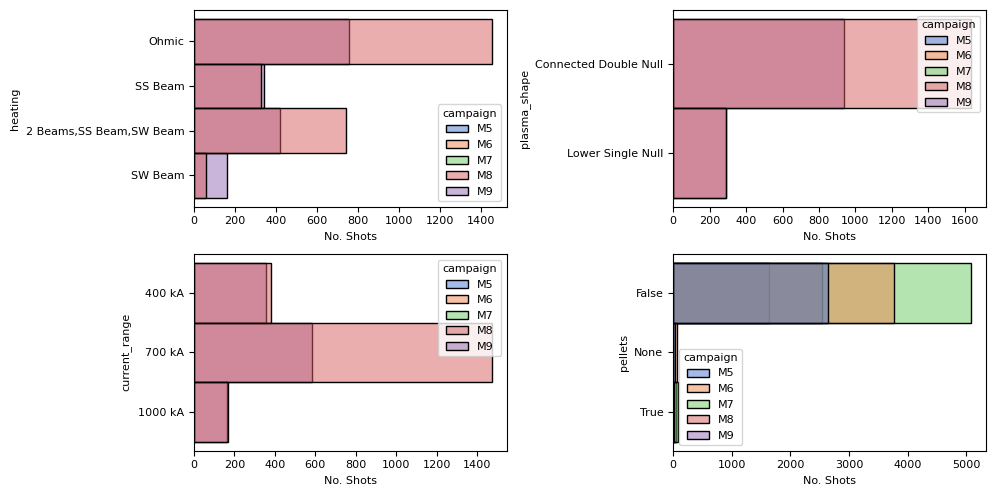

In [18]:

fig, axes = plt.subplots(2, 2, figsize=(10, 5))
ax1, ax2, ax3, ax4 = axes.flatten()

sns.histplot(summary, y='heating', hue='campaign', ax=ax1)
sns.histplot(summary, y='plasma_shape', hue='campaign', ax=ax2)
sns.histplot(summary, y='current_range', hue='campaign', ax=ax3)
sns.histplot(summary, y=summary.pellets.astype(str), hue='campaign', ax=ax4)

for ax in axes.flatten():
    ax.set_xlabel('No. Shots')

plt.tight_layout()

### Plasma Beta ($\beta$) v.s Confinement Time ($\tau_E$)

This plot can show how the efficiency of energy confinement varies with plasma pressure.

Text(0.5, 0, 'Plasma Beta $\\beta$ (%)')

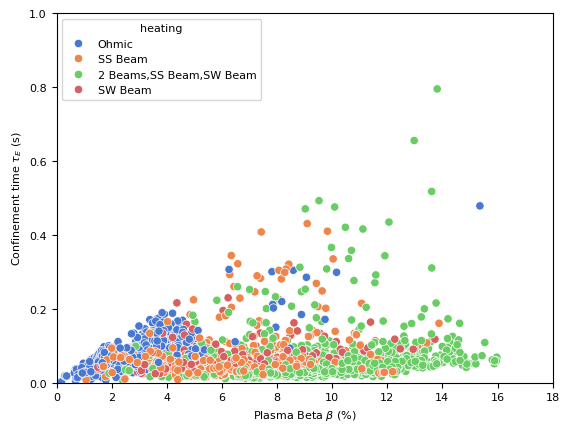

In [19]:
plt.figure()
sns.scatterplot(summary, y='cpf_tautot_max', x='cpf_betmhd_max', hue='heating')
plt.xlim(0, 18)
plt.ylim(0, 1)
# plt.yscale('log')
plt.ylabel('Confinement time $\\tau_E$ (s)')
plt.xlabel('Plasma Beta $\\beta$ (%)')

### Plasma Temperature ($T_e$) vs. Plasma Density ($n_e$)
This can reveal the relationship between temperature and density, which is critical for achieving the conditions necessary for fusion.

Text(0.5, 0, 'Density $n_e$ ($m^{-3}$)')

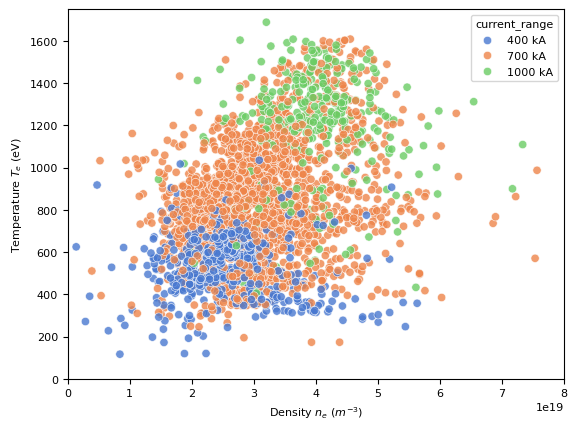

In [20]:
plt.figure()
sns.scatterplot(summary, y='cpf_te0_ipmax', x='cpf_ne0_ipmax', hue='current_range', alpha=0.8)
plt.xlim(0, .8e20)
plt.ylim(0, 1750)
plt.ylabel('Temperature $T_e$ (eV)')
plt.xlabel('Density $n_e$ ($m^{-3}$)')

### Plasma Current ($I_p$) vs. Confinement Time ($\tau_E$)

This can indicate how the plasma current affects the confinement time, providing insights into stability and performance.

Text(0, 0.5, 'Average Plasma Current  $I_p$ (kA)')

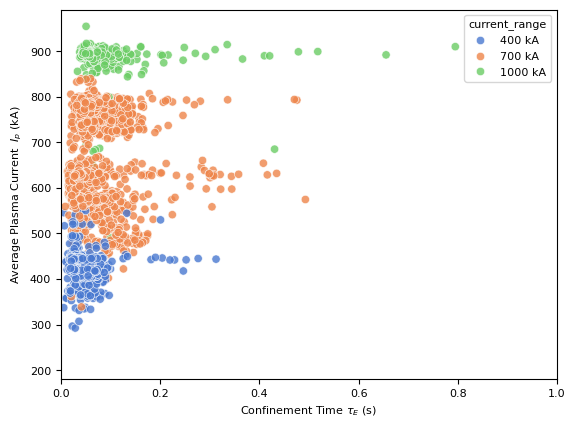

In [21]:
plt.figure()
sns.scatterplot(summary, y='cpf_ip_av', x='cpf_tautot_max', hue='current_range', alpha=0.8)
plt.xlim(0, 1)
plt.xlabel('Confinement Time $\\tau_E$ (s)')
plt.ylabel('Average Plasma Current  $I_p$ (kA)')